In [17]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"? 

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***. 

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$). 

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [18]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations 
# of this multinomial random variable, and note it's relationship to `n`

array([1, 6, 2, 1])

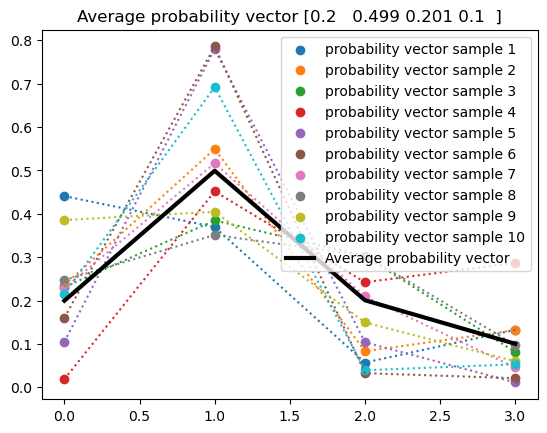

In [19]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector"); 
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

The sequence $\mathbf{x}^{(t)}$, which starts at $t=0$ when the convenience store begins counting chip purchases, represents the cumulative count of each chip brand purchased over time. Initially, at $t=0$, this vector is all zeros, indicating no purchases yet. As time progresses, with each purchase of a particular brand, the corresponding element in $\mathbf{x}^{(t)}$ increments by one, gradually building a comprehensive record of total sales per brand. This accumulation reflects not only the sales trends but also the popularity of each brand. The changes in $\mathbf{x}^{(t)}$ over time offer insights into customer preferences and purchasing behaviors.

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


The posterior Dirichlet distribution:

$$
f(\mathbf{p} | \mathbf{x}, \boldsymbol{\alpha}) = \frac{1}{\mathrm{B}(\boldsymbol{\alpha}_{\text{posterior}})} \prod_{j=1}^k p_j^{\alpha_j + x_j - 1}
$$

$ \boldsymbol{\alpha}_{\text{posterior}} = \boldsymbol{\alpha} + \mathbf{x} $

Here, $ \mathbf{x} = [x_1, x_2, \ldots, x_k] $ represents the observed sales count for each chip brand, and the addition is element-wise. $ \boldsymbol{\alpha} = [\alpha_1, \alpha_2, \ldots, \alpha_k] $ is the initial parameter vector of the Dirichlet prior, reflecting our initial beliefs about the chip brands' popularity.


3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$. 

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each. 

In [20]:
j=1
alpha = np.array([1, 1, 1, 1]) 
x_t = np.array([2, 5, 2, 1])   
alpha_posterior = alpha + x_t

samples = stats.dirichlet(alpha_posterior).rvs(size=100000)

p_j_samples = samples[:, j]

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [21]:
q = 0.3 

probability = np.mean(p_j_samples > q)

print("Probability estimate: ", probability)

Probability estimate:  0.83539


5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$. 


In [22]:
lower_bound = np.percentile(p_j_samples, 2.5)
upper_bound = np.percentile(p_j_samples, 97.5)

print(f"95% credible interval for p_j: [{lower_bound}, {upper_bound}]")

95% credible interval for p_j: [0.19298978488194787, 0.6835886478521398]


6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [23]:
j = 0                           # Index for the first chip brand (e.g., brand 1)
j_prime = 1                     # Index for the second chip brand (e.g., brand 2)

probability = np.mean(samples[:, j] > samples[:, j_prime])

print("Estimated probability that p_j is greater than p_j': ", probability)


Estimated probability that p_j is greater than p_j':  0.14521


7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


In [24]:
ratios = samples[:, j] / samples[:, j_prime]

lower_bound = np.percentile(ratios, 2.5)
upper_bound = np.percentile(ratios, 97.5)

print(f"95% credible interval for the ratio p_j / p_j': [{lower_bound}, {upper_bound}]")

95% credible interval for the ratio p_j / p_j': [0.09199373981538285, 1.864399102104459]


8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$. 

In [25]:
differences = samples[:, j] - samples[:, j_prime]

lower_bound = np.percentile(differences, 2.5)
upper_bound = np.percentile(differences, 97.5)

print(f"95% credible interval for p_j - p_j': [{lower_bound}, {upper_bound}]")

95% credible interval for p_j - p_j': [-0.5836328922623717, 0.19338076424144177]


9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


$p\left(\frac{p_j}{p_{j'}} | \mathbf{x}^{(t)}\right)$ and $p\left(p_j - p_{j'} | \mathbf{x}^{(t)}\right)$ are relevant for understanding relationships between the probabilities of different chip brands in the context of the true probability vector $\mathbf{p} = [0.397, 0.4, 0.2, 0.002, 0.001]$. The ratio $\frac{p_j}{p_{j'}}$ provides a relative measure of popularity between two brands, while the difference $p_j - p_{j'}$ offers an absolute measure. For $(j, j') = (2, 3)$, where $p_2$ and $p_3$ are relatively close in value, the ratio and difference will both capture meaningful information about the slight preference for brand 2 over brand 3. However, for $(j, j') = (4, 5)$, the probabilities of both brands are very low, making the absolute difference $p_4 - p_5$ quite small and potentially less informative. In this case, the ratio $\frac{p_4}{p_5}$ offers more insight, as it can magnify even small absolute differences in very low probabilities, providing a clearer picture of the relative popularity between these two less popular brands.


10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining 
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


As $t$ increases, we would expect $p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ and  $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$ to reflect the true probabilities. Given that $p_4$ and $p_5$ are very low, a substantial amount of time is necessary to gather enough data to reliably estimate these small probabilities. In short, we know that $t$ must be high if we are getting results from the distributions that reflect the true $p$.